# Mall Customers Segmentation : Gaussian-Mixture-Model - Basic Model

In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_Raw_data = pd.read_csv(r"C:\Users\nkhg\Desktop\AIML\30 Projects\DAY7\Mall_Customers.csv")
df_Raw_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Droping Unwanted values
df_Raw_data.drop(['CustomerID', 'Genre'], axis = 1, inplace = True)
df_Raw_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


No Null values are present in data set.

In [4]:
from sklearn.preprocessing import StandardScaler
stdsclar = StandardScaler().fit_transform(df_Raw_data)

C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

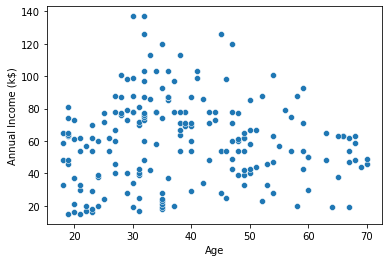

In [5]:
sns.scatterplot('Age','Annual Income (k$)', data = df_Raw_data)

C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

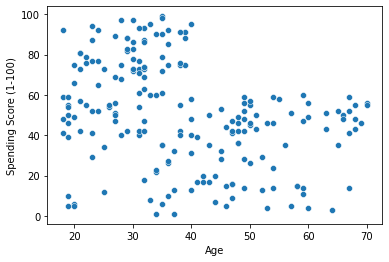

In [6]:
sns.scatterplot('Age','Spending Score (1-100)', data = df_Raw_data)

C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

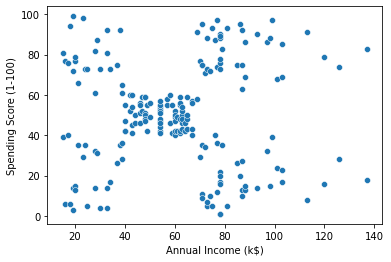

In [7]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data = df_Raw_data)

In [8]:
n_comp = np.arange(1,10)
cova_type = ['full', 'spherical', 'diag']

In [9]:

bic = []
aic = []

In [10]:
from sklearn.mixture import GaussianMixture as gmm
from itertools import product
gmm_params = list(product(n_comp, cova_type))
for i in gmm_params:
    GMM = gmm(n_components = i[0], covariance_type = i[1], random_state = 0).fit(stdsclar)
    bic.append(GMM.bic(stdsclar))
    aic.append(GMM.aic(stdsclar))

In [11]:
gmm_df = pd.DataFrame(gmm_params, columns = ['n_components', 'covariance'])

In [12]:
gmm_df.loc[:, 'bic'] = bic
gmm_df.loc[:, 'aic'] = aic
gmm_df.head(5)

,n_components,covariance,bic,aic
0,1,full,1727.721619,1698.036762
1,1,spherical,1723.919509,1710.726240
2,1,diag,1734.516144,1714.726240
3,2,full,1656.962213,1594.294183
4,2,spherical,1720.303808,1690.618952


C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_components', ylabel='bic'>

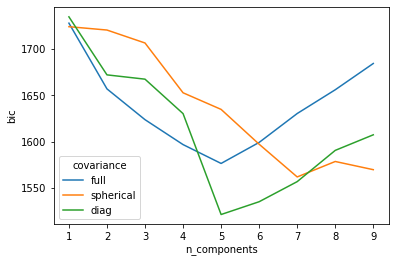

In [13]:
sns.lineplot('n_components', 'bic', data = gmm_df, hue = 'covariance')

C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_components', ylabel='aic'>

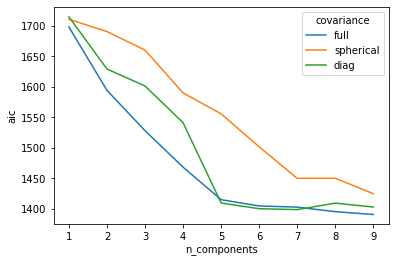

In [14]:
sns.lineplot('n_components', 'aic', data = gmm_df, hue = 'covariance')

In [33]:
GMM_Final = gmm(n_components = 5, covariance_type = 'diag', random_state = 0).fit(stdsclar)

In [34]:
labels = GMM_Final.predict(stdsclar)
labels

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int64)

In [35]:
col = df_Raw_data.columns

In [36]:
GMM_data = pd.DataFrame(stdsclar, columns = col)

C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

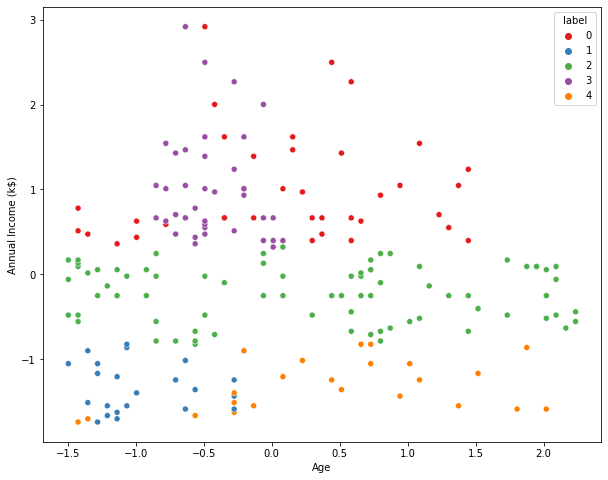

In [37]:

GMM_data.loc[:, 'label'] = labels
plt.figure(figsize=(10,8))
sns.scatterplot('Age', 'Annual Income (k$)', data = GMM_data, hue = 'label', legend = 'full', palette = 'Set1')

C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

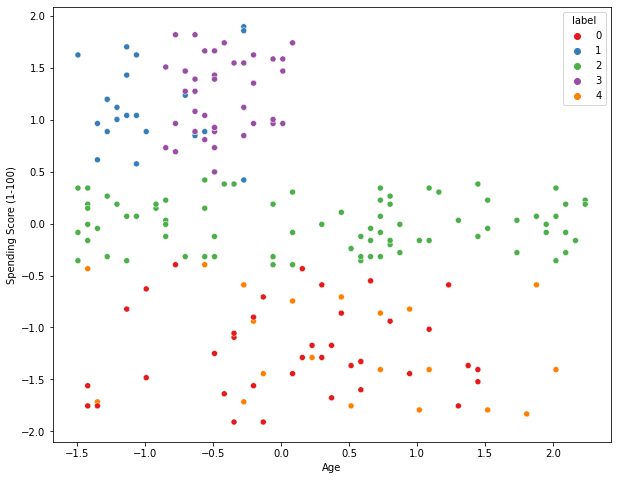

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot('Age', 'Spending Score (1-100)', data = GMM_data, hue = 'label', legend = 'full', palette = 'Set1')

C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

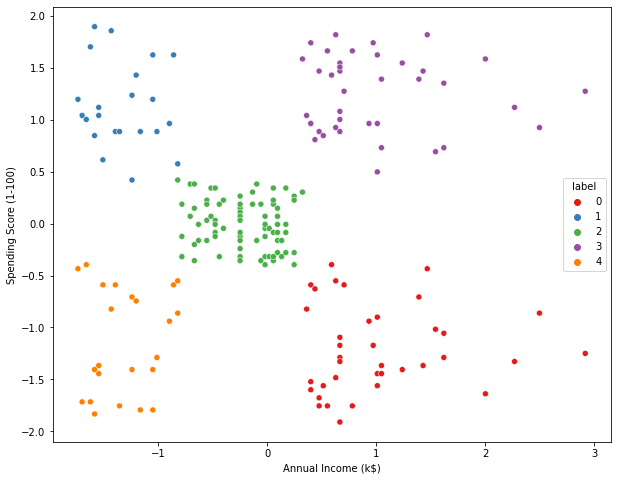

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data = GMM_data, hue = 'label', legend = 'full', palette = 'Set1')

In [40]:
GMM_data['label'].value_counts().to_frame()

,label
2,78
3,39
0,38
4,23
1,22


C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

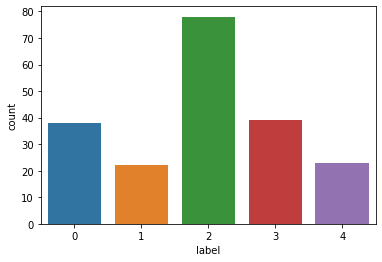

In [41]:
sns.countplot(GMM_data['label'], data = GMM_data)